# **1. Perkenalan Dataset**


Dataset dapat diperoleh dari \
https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators \
\
Dataset "CDC Diabetes Health Indicators" dari UCI Machine Learning Repository berisi data yang terkait dengan indikator kesehatan diabetes yang dikumpulkan oleh Centers for Disease Control and Prevention (CDC). Dataset ini memberikan informasi tentang berbagai metrik kesehatan dan faktor demografis yang digunakan untuk memprediksi kemungkinan seseorang menderita diabetes.


# **2. Import Library**

In [24]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import nbformat
print(nbformat.__version__)

5.10.4


# **3. Load Dataset**

In [25]:
# Fetch dataset
df = cdc_diabetes_health_indicators=fetch_ucirepo(id=891)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Data Wrangling

In [26]:
df=cdc_diabetes_health_indicators.data.original
df.head()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,1,40,1,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,1,0,0,0,0,25,1,0,0,1,...,0,1,3,0,0,0,0,7,6,1
2,2,0,1,1,1,28,0,0,0,0,...,1,1,5,30,30,1,0,9,4,8
3,3,0,1,0,1,27,0,0,0,1,...,1,0,2,0,0,0,0,11,3,6
4,4,0,1,1,1,24,0,0,0,1,...,1,0,2,3,0,0,0,11,5,4


### Assessing Data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   ID                    253680 non-null  int64
 1   Diabetes_binary       253680 non-null  int64
 2   HighBP                253680 non-null  int64
 3   HighChol              253680 non-null  int64
 4   CholCheck             253680 non-null  int64
 5   BMI                   253680 non-null  int64
 6   Smoker                253680 non-null  int64
 7   Stroke                253680 non-null  int64
 8   HeartDiseaseorAttack  253680 non-null  int64
 9   PhysActivity          253680 non-null  int64
 10  Fruits                253680 non-null  int64
 11  Veggies               253680 non-null  int64
 12  HvyAlcoholConsump     253680 non-null  int64
 13  AnyHealthcare         253680 non-null  int64
 14  NoDocbcCost           253680 non-null  int64
 15  GenHlth               253680 non-n

Pada informasi dataset, diketahui bahwa tipe data seluruh fitur merupakan integer. Namun, pada deskripsi dataset yang ada pada archive.ics.uci.edu/dataset/891, diketahui bahwa bilangan bulat tersebut dapat juga merepresentasikan biner (ya/tidak). Berikut adalah penjelasannya

| Nama Fitur                | Deskripsi                                                      | Jenis Fitur   | Satuan                           |
|---------------------------|----------------------------------------------------------------|---------------|----------------------------------|
| **BMI**                   | Body Mass Index                                                | Numerik       | Integer                         |
| **GenHlth**               | General Health (1-5 scale)                                     | Numerik       | Skala 1-5 (1 = excellent, 5 = poor) |
| **MentHlth**              | Mental Health (1-30 days)                                      | Numerik       | Skala 1-30 hari                  |
| **PhysHlth**              | Physical Health (1-30 days)                                    | Numerik       | Skala 1-30 hari                  |
| **Age**                   | Age (13-level age categories)                                  | Numerik       | Kategori usia (1 = 18-24, 9 = 60-64, 13 = 80 atau lebih) |
| **Education**             | Education Level (1-6 scale)                                    | Numerik       | Skala 1-6 (1 = Tidak pernah sekolah, 6 = Lulusan perguruan tinggi) |
| **Income**                | Income (1-8 scale)                                             | Numerik       | Skala 1-8 (1 = < $10,000, 8 = >= $75,000) |
| **ID**                    | Patient ID (Untuk identifikasi)                                | Kategorikal   | Integer                         |
| **Diabetes_binary**       | Prediabetes atau diabetes (0 = no, 1 = prediabetes/diabetes)  | Kategorikal   | 0 = no, 1 = prediabetes/diabetes |
| **HighBP**                | High Blood Pressure (0 = no, 1 = high BP)                     | Kategorikal   | 0 = no, 1 = high BP             |
| **HighChol**              | High Cholesterol (0 = no, 1 = high cholesterol)                | Kategorikal   | 0 = no, 1 = high cholesterol    |
| **CholCheck**             | Cholesterol check in 5 years (0 = no, 1 = yes)                 | Kategorikal   | 0 = no, 1 = yes                 |
| **Smoker**                | Smoking status (0 = no, 1 = yes)                               | Kategorikal   | 0 = no, 1 = yes                 |
| **Stroke**                | Ever had a stroke (0 = no, 1 = yes)                            | Kategorikal   | 0 = no, 1 = yes                 |
| **HeartDiseaseorAttack**  | Heart disease or heart attack (0 = no, 1 = yes)                | Kategorikal   | 0 = no, 1 = yes                 |
| **PhysActivity**          | Physical activity in the past 30 days (0 = no, 1 = yes)        | Kategorikal   | 0 = no, 1 = yes                 |
| **Fruits**                | Consume fruits daily (0 = no, 1 = yes)                         | Kategorikal   | 0 = no, 1 = yes                 |
| **Veggies**               | Consume vegetables daily (0 = no, 1 = yes)                     | Kategorikal   | 0 = no, 1 = yes                 |
| **HvyAlcoholConsump**     | Heavy alcohol consumption (0 = no, 1 = yes)                    | Kategorikal   | 0 = no, 1 = yes                 |
| **AnyHealthcare**         | Health care coverage (0 = no, 1 = yes)                         | Kategorikal   | 0 = no, 1 = yes                 |
| **NoDocbcCost**           | Couldn't see a doctor due to cost (0 = no, 1 = yes)            | Kategorikal   | 0 = no, 1 = yes                 |
| **DiffWalk**              | Difficulty walking or climbing stairs (0 = no, 1 = yes)        | Kategorikal   | 0 = no, 1 = yes                 |
| **Sex**                   | Gender (0 = female, 1 = male)                                  | Kategorikal   | 0 = female, 1 = male            |


In [28]:
df.isna().sum()

ID                      0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Melalui perintah di atas, diketahui bahwa tidak ada missing value pada dataset, sehingga tidak diperlukan penanganan khusus terhadap missing value.

In [29]:
df.duplicated().sum()

0

Melalui perintah di atas, diketahui bahwa tidak ada nilai duplikat pada dataset, sehingga tidak diperlukan penanganan khusus terhadap nilai duplikat.

In [30]:
df.describe()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,126839.500000,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,73231.252481,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,63419.750000,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,126839.500000,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,190259.250000,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,253679.000000,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# **5. Data Preprocessing**

### Menghapus atau Menangani Data Kosong (Missing Values)
    - Karena tidak ada nilai yang kosong, maka tahapan ini tidak perlu dilakukan.

### Menghapus Data Duplikat
    - Karena tidak ada nilai yang duplikat, maka tahapan ini tidak perlu dilakukan.

### Normalisasi atau Standarisasi Fitur

### Deteksi dan Penanganan Outlier

### Encoding Data Kategorikal

### Binning (Pengelompokan Data)

In [31]:
#Type your code here

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, akan dilakukan 

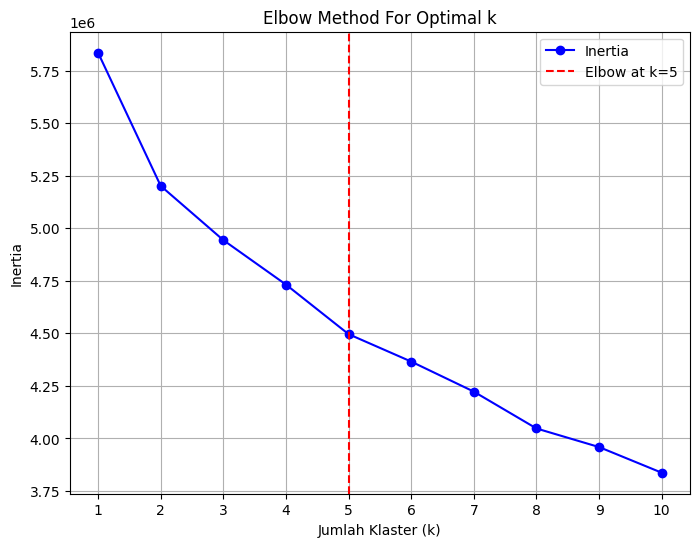

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator  # Import Kneedle untuk mencari elbow

# Misalnya df sudah terisi data Anda

# Mengambil data fitur numerik
X = df

# Normalisasi data untuk memperbaiki performa model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah klaster yang berbeda
inertia = []
k_range = range(1, 11)  # Mengecek jumlah klaster dari 1 hingga 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Menggunakan Kneedle untuk menemukan elbow
kneedle = KneeLocator(k_range, inertia, curve="convex", direction="decreasing")
elbow_point = kneedle.elbow

# Visualisasikan elbow method
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='b', label='Inertia')
plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Elbow at k={elbow_point}')  # Garis menunjukkan elbow
plt.title('Elbow Method For Optimal k')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()


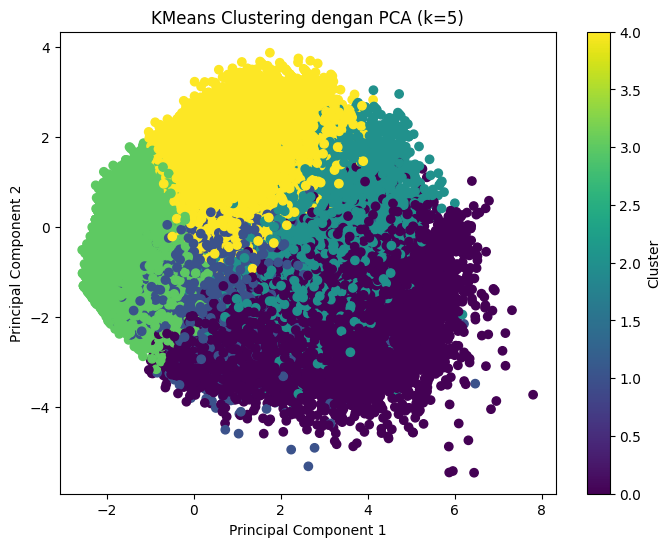

In [34]:
# Jika data lebih dari dua fitur, Anda dapat melakukan PCA untuk visualisasi dua dimensi
from sklearn.decomposition import PCA

# Menggunakan PCA untuk mengurangi dimensi data menjadi 2 untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi data yang telah dikurangi dimensinya
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('KMeans Clustering dengan PCA (k=5)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

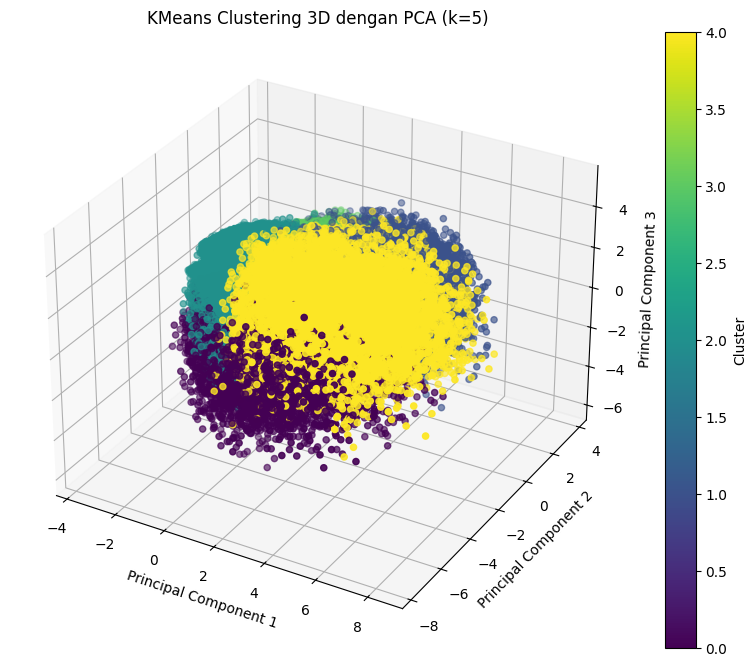

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Mengambil data fitur numerik
X = df
# Normalisasi data untuk memperbaiki performa model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Terapkan KMeans dengan k = 5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Tambahkan hasil klaster ke dalam dataset
df['Cluster'] = kmeans.labels_

# Terapkan PCA untuk mereduksi dimensi data ke 3 komponen utama
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi 3D hasil klastering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Ambil komponen PCA untuk sumbu X, Y, Z
x = X_pca[:, 0]  # Komponen 1
y = X_pca[:, 1]  # Komponen 2
z = X_pca[:, 2]  # Komponen 3

# Plot titik berdasarkan klaster yang dihasilkan
scatter = ax.scatter(x, y, z, c=df['Cluster'], cmap='viridis')

# Labeling
ax.set_title('KMeans Clustering 3D dengan PCA (k=5)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Tambahkan colorbar
cbar = plt.colorbar(scatter, ax=ax, label='Cluster')

plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8576\757308899.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8576\757308899.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8576\757308899.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8576\757308899.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

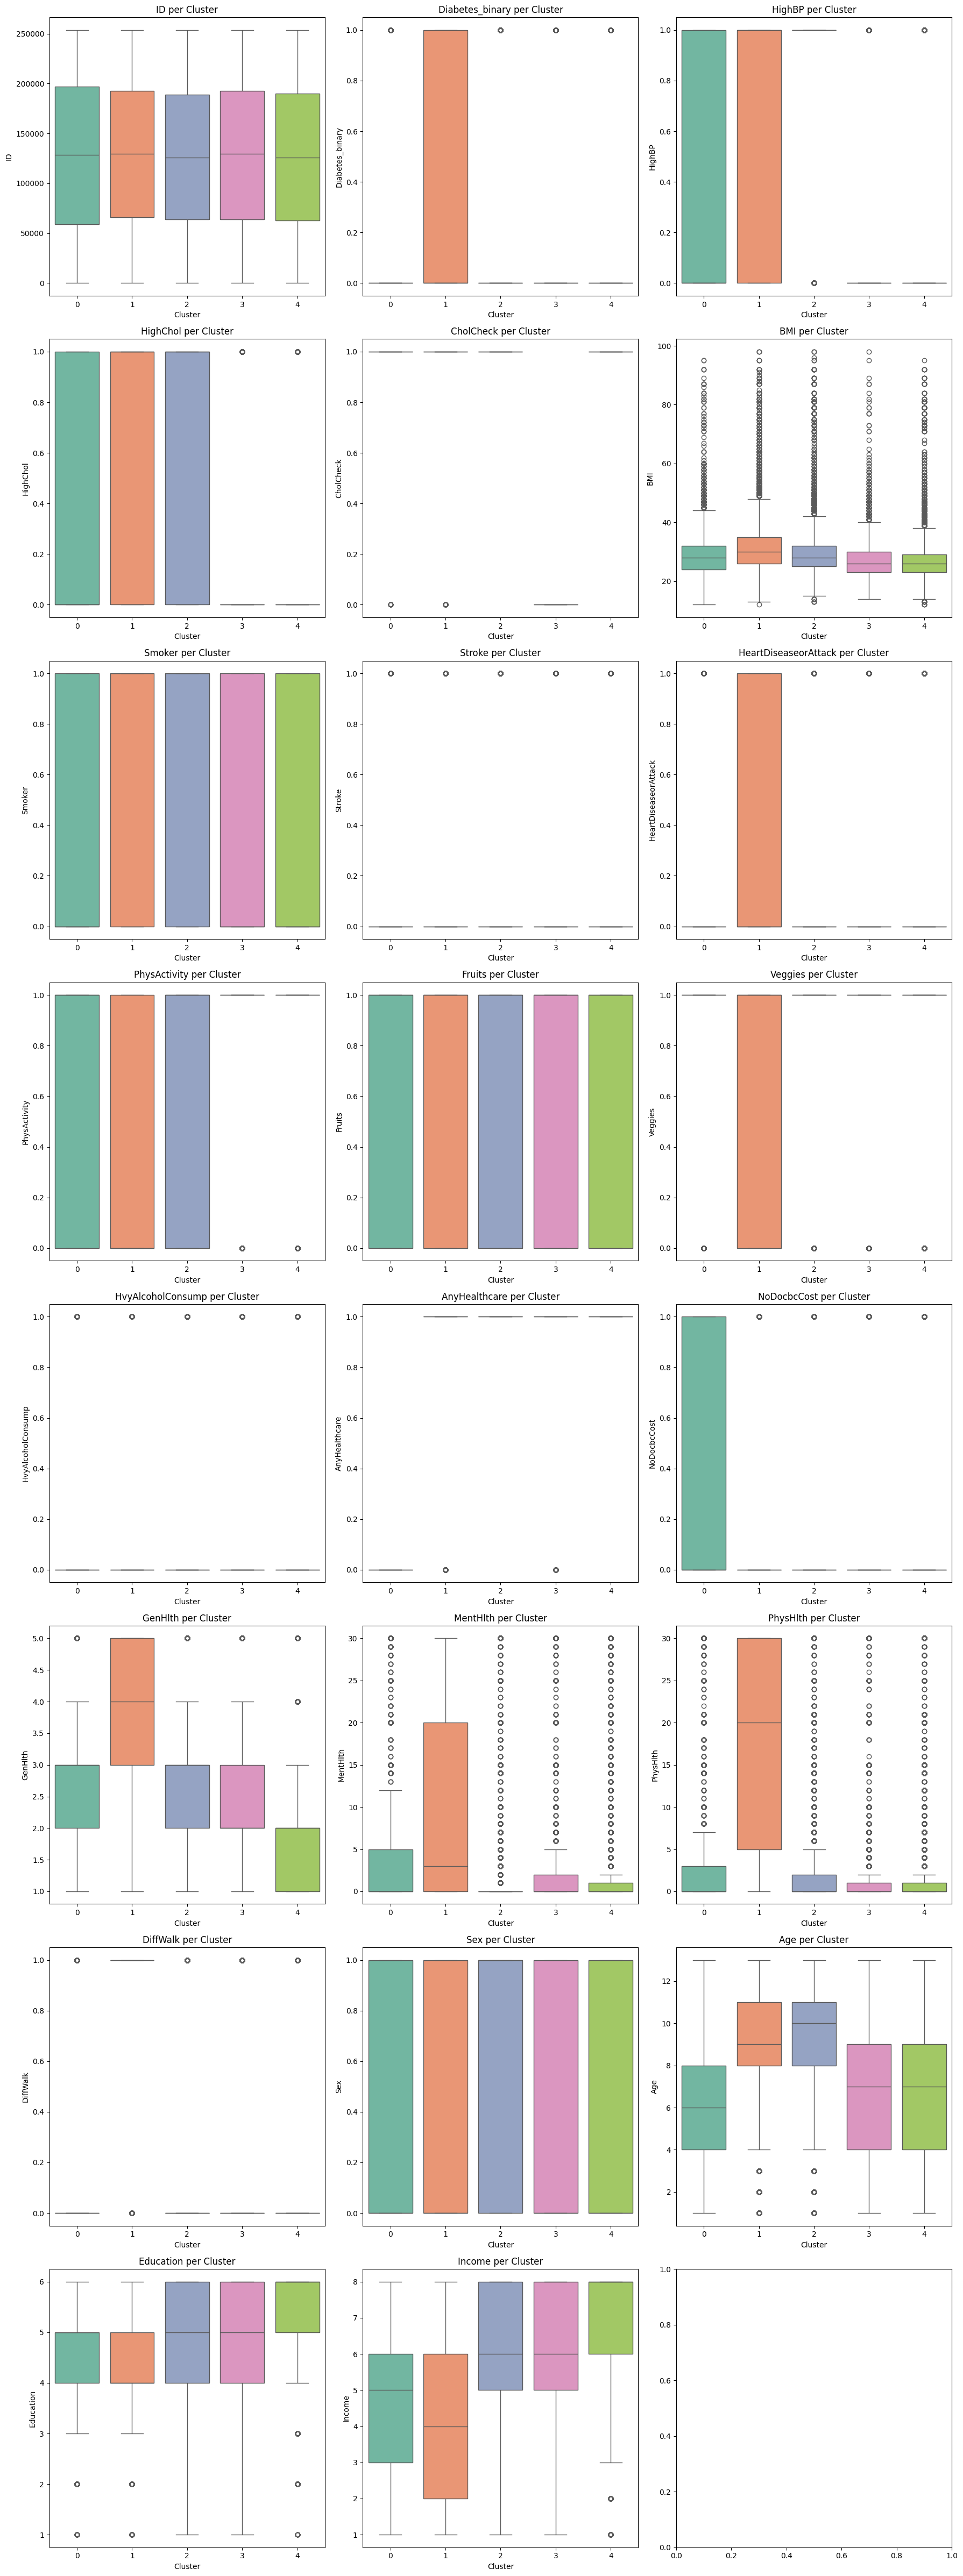

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Misalnya df sudah berisi data
# Seleksi hanya fitur numerik dari df
df_numerik = df.select_dtypes(include=['float64', 'int64'])

# Normalisasi data untuk memperbaiki performa model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numerik)

# Terapkan KMeans dengan k = 5
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Menentukan jumlah subplot berdasarkan jumlah fitur numerik
n_features = df_numerik.shape[1]
n_rows = (n_features // 3) + (1 if n_features % 3 > 0 else 0)  # Mengatur jumlah baris subplot

# Membuat subplot untuk boxplot setiap fitur
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6 * n_rows))

# Merapikan agar setiap fitur tampil dalam boxplot-nya
axes = axes.flatten()

# Loop untuk setiap fitur numerik dan membuat boxplot untuk masing-masing klaster
for i, feature in enumerate(df_numerik.columns):
    sns.boxplot(x='Cluster', y=feature, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} per Cluster')

# Menyesuaikan layout agar tidak ada yang tertimpa
plt.tight_layout()
plt.show()


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

In [ ]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.